In [17]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns

#from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [18]:
file_path = Path("Data\data_2019.csv")
cct = pd.read_csv(file_path)
cct.tail()

,User,Card,Year,Month,Day,Hour,Minutes,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,isFraud
272113,1996,3,2019,12,30,12,0,6.86,Chip Transaction,3379,Independence,KY,5814,No
272114,1996,3,2019,12,30,18,30,17.94,Chip Transaction,2331,Independence,KY,5541,No
272115,1996,3,2019,12,31,12,17,16.53,Chip Transaction,4512,Independence,KY,5499,No
272116,1996,3,2019,12,31,12,26,57.00,Chip Transaction,4512,Independence,KY,5499,No
272117,1996,3,2019,12,31,12,26,-57.00,Chip Transaction,4512,Independence,KY,5499,No


In [141]:
temp= cct.groupby(['Month','Day','Hour','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
temp.head()

,Month,Day,Hour,isFraud,min,max,count,sum,mean,median,var
0,1,1,0,No,1.93,167.39,13,776.61,59.739231,41.390,3929.236374
1,1,1,1,No,2.46,39.14,6,93.62,15.603333,7.165,261.653067
2,1,1,2,No,-481.00,146.49,5,-289.60,-57.920000,14.690,59267.293550
3,1,1,3,No,16.46,144.41,7,453.98,64.854286,36.550,2923.184762
4,1,1,4,No,-399.00,156.59,10,85.54,8.554000,20.420,23796.586849


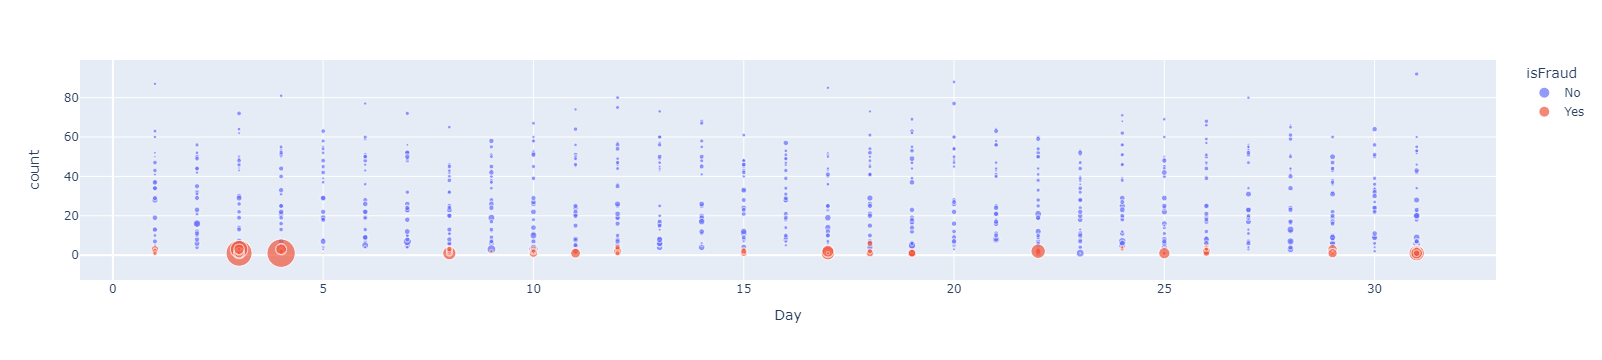

In [86]:
fig = px.scatter(temp.query("Month==1"), x="Day", y="count", size="median", color="isFraud",
           hover_name="isFraud", log_x=False)
fig.show()

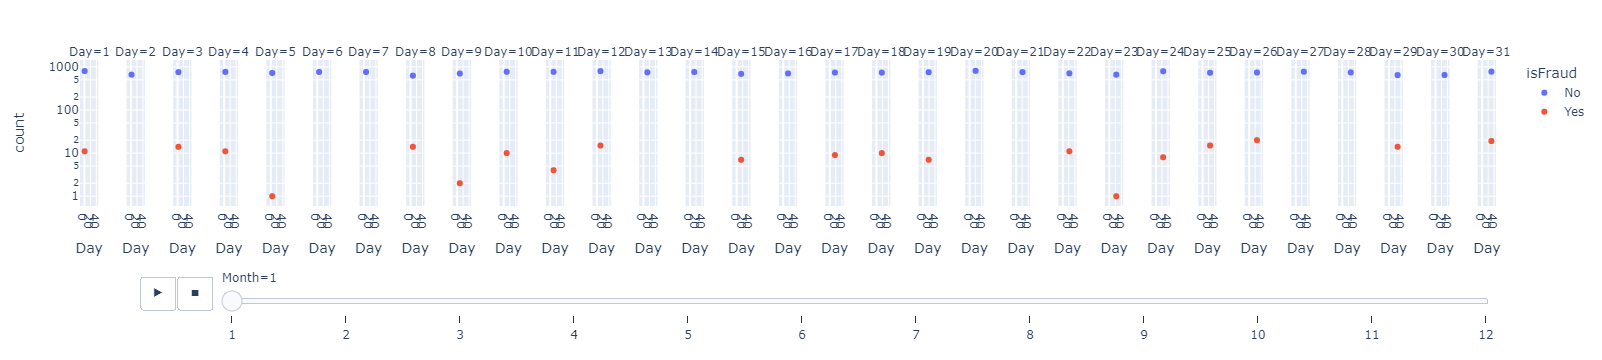

In [157]:
temp2= cct.groupby(['Month','Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
temp2.head()
fig = px.scatter(temp2, x="Day", y="count", animation_frame="Month", #animation_group="isFraud",
                   #size="count", 
                 color="isFraud", 
                 #hover_name="country", 
                 facet_col="Day",
               log_y=True, #size_max=45, range_x=[100,100000], 
                 #range_y=[0,1000]
                )
fig.show()

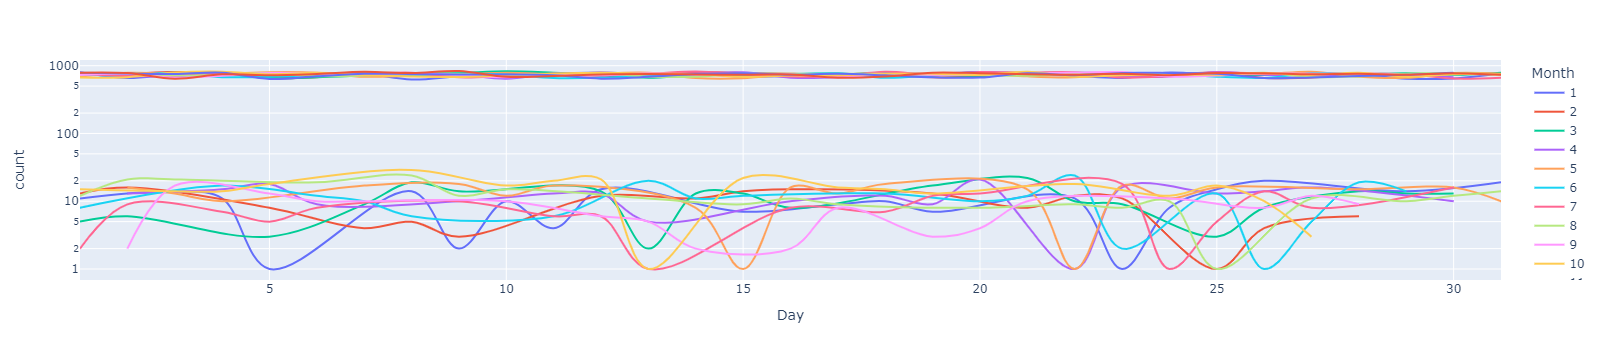

In [82]:
fig = px.line(temp2, x="Day", y="count", color="Month", line_group="isFraud", hover_name="isFraud",
        line_shape="spline", render_mode="svg", log_y=True)
fig.show()

In [147]:
temp= cct.groupby(['Month','Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
fraud = temp#[temp['isFraud']=='Yes']
fraud

,Month,Day,isFraud,min,max,count,sum,mean,median,var
0,1,1,No,-493.00,767.66,800,25337.99,31.672488,22.155,6906.685151
1,1,1,Yes,1.19,107.00,11,416.50,37.863636,26.770,1351.661285
2,1,2,No,-100.00,664.34,660,31589.60,47.863030,31.145,5295.996519
3,1,3,No,-440.00,543.72,755,26794.96,35.490013,23.840,4622.353615
4,1,3,Yes,8.09,958.30,14,2605.05,186.075000,75.225,70742.672442
...,...,...,...,...,...,...,...,...,...,...
549,12,27,No,-234.00,732.90,746,30550.25,40.952078,29.360,4217.053022
550,12,28,No,-159.00,868.04,760,30150.45,39.671645,23.895,5607.768105
551,12,29,No,-100.00,624.64,734,31933.88,43.506649,27.565,4570.837442
552,12,30,No,-396.00,1624.93,776,34604.71,44.593698,26.240,9445.775220


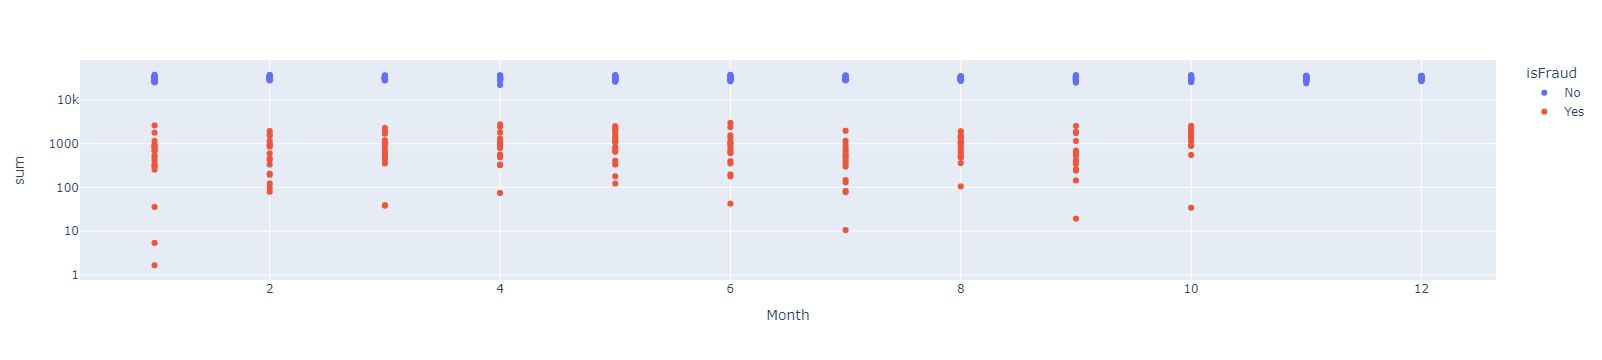

In [76]:
fraud_plot = px.scatter(fraud, x="Month", y="sum", 
                        #size="max", 
                        color="isFraud",
           hover_name="Month", log_y=True)

fraud_plot.show()

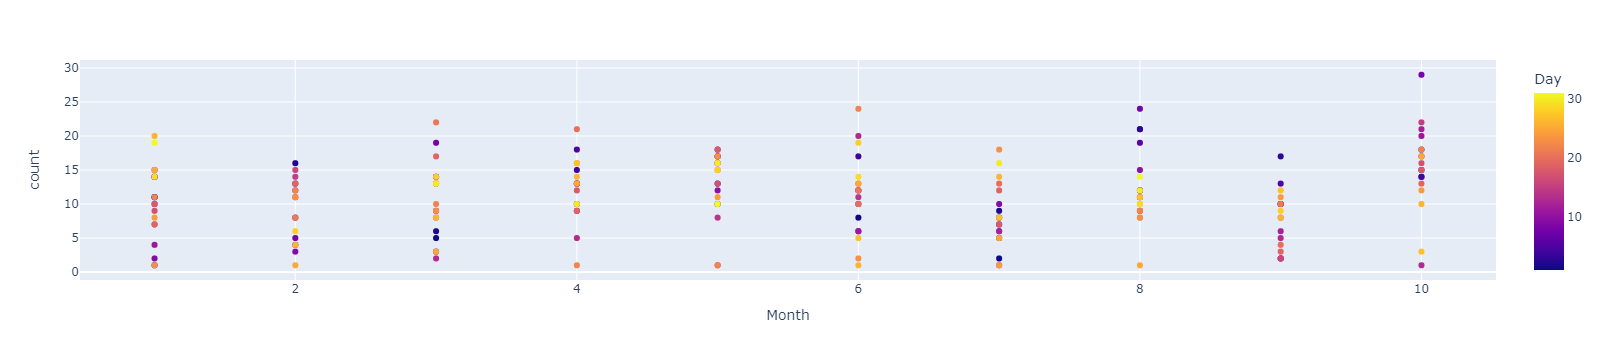

In [139]:
temp= cct.groupby(['Month','Day','isFraud'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
fraud = temp[temp['isFraud']=='Yes']
fig = px.scatter(fraud, x="Month", y="count", color="Day", 
                 #line_group="isFraud", 
                 hover_name="isFraud",
        #line_shape="spline", 
                 render_mode="svg", log_y=False)
fig.show()

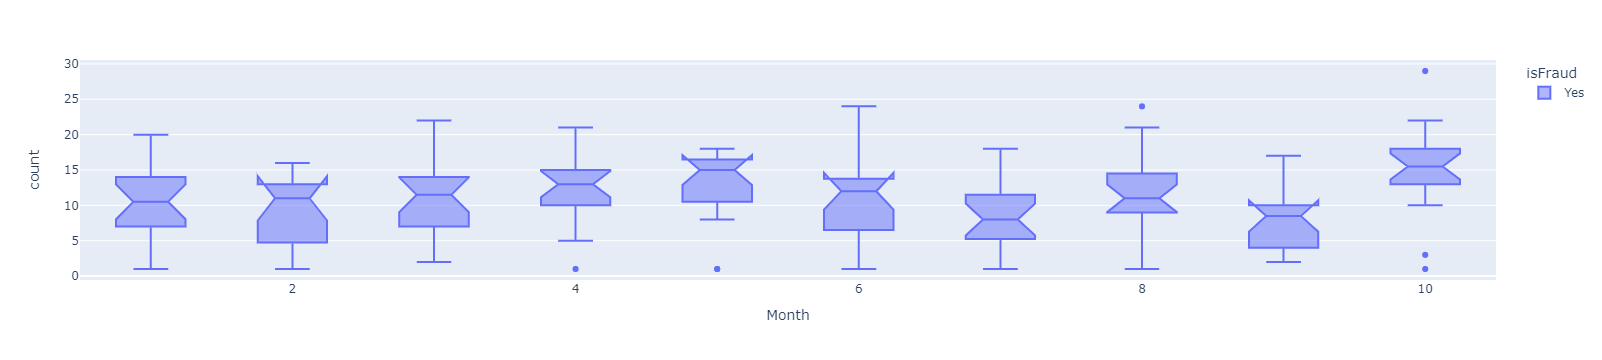

In [113]:
fig = px.box(fraud, x="Month", y="count", color="isFraud", notched=True)
fig.show()

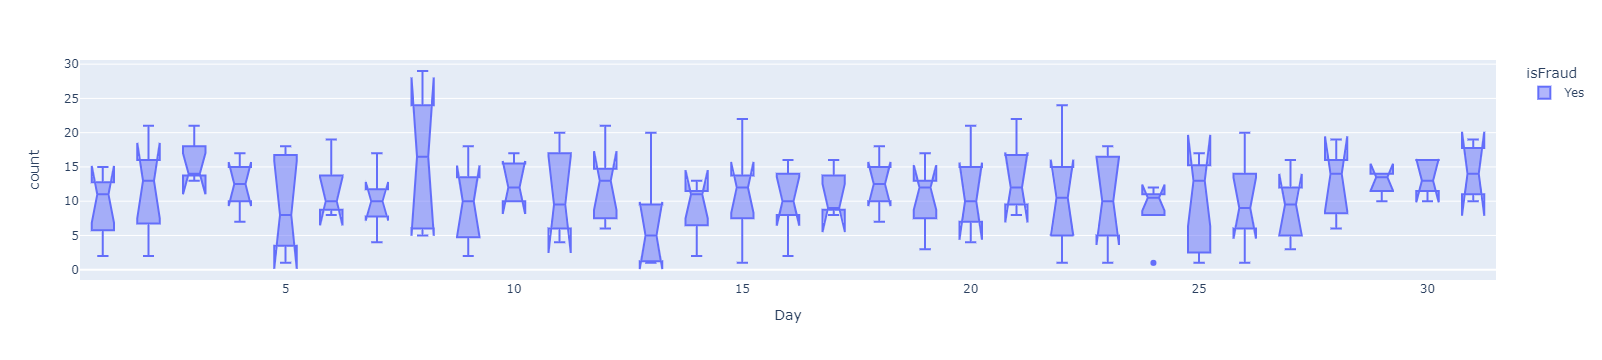

In [115]:
fig = px.box(fraud, x="Day", y="count", color="isFraud", notched=True)
fig.show()

## Doing the hourly breakdown of features


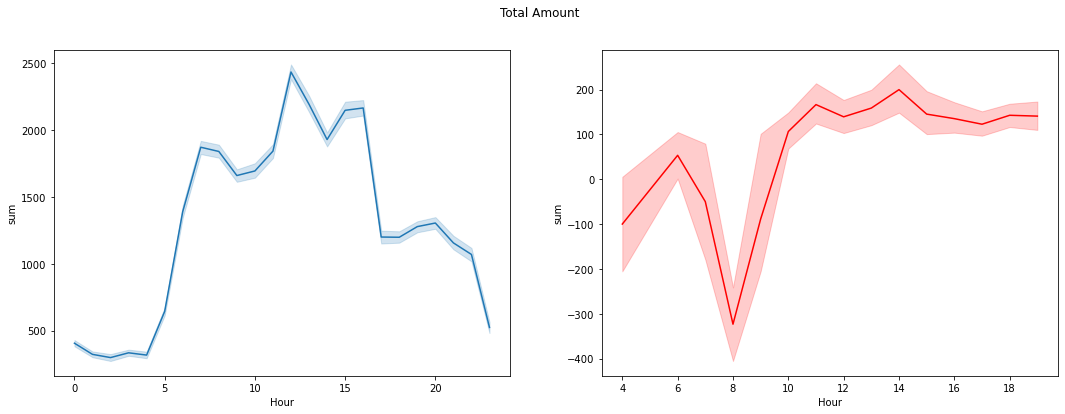

In [142]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="sum", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="sum", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show();

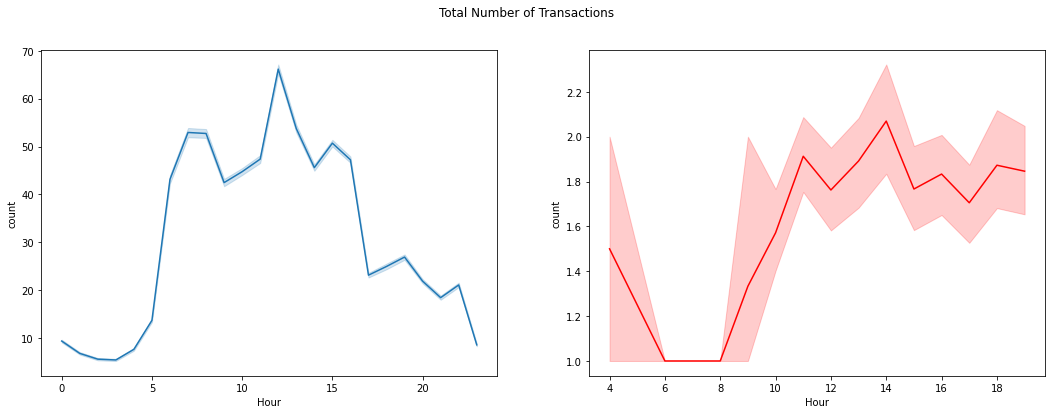

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="count", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="count", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

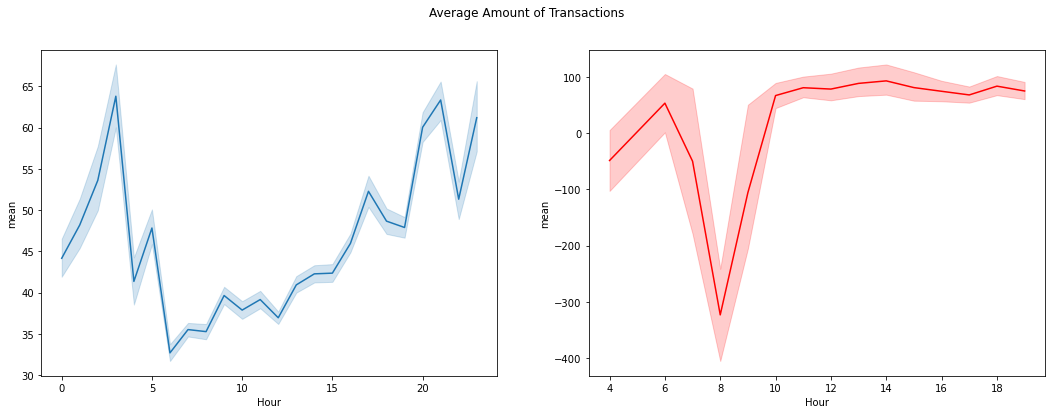

In [121]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="mean", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="mean", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

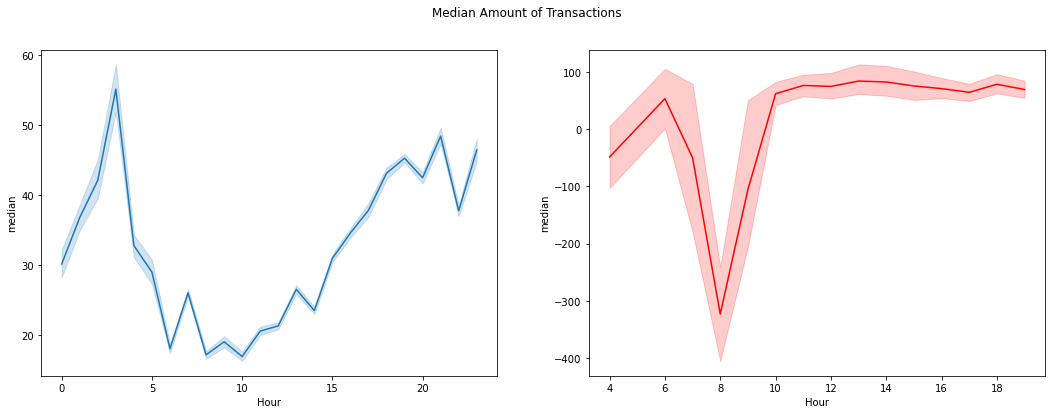

In [123]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="median", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="median", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

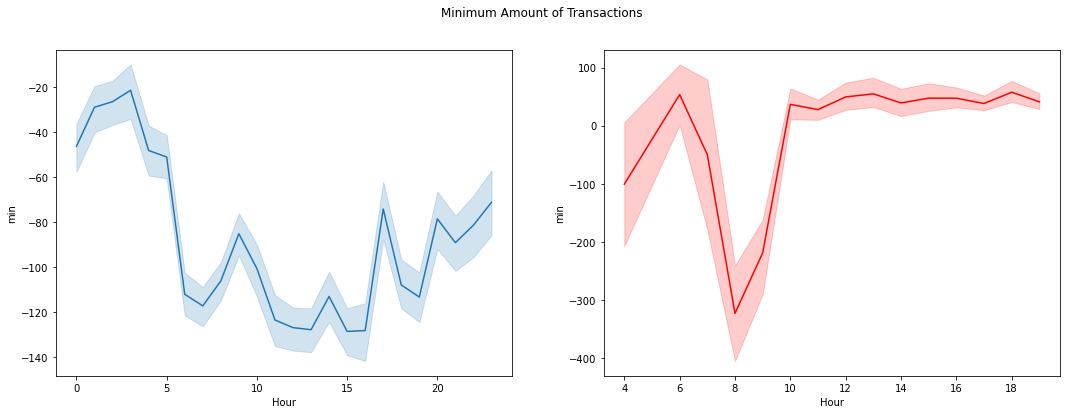

In [143]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="min", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="min", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

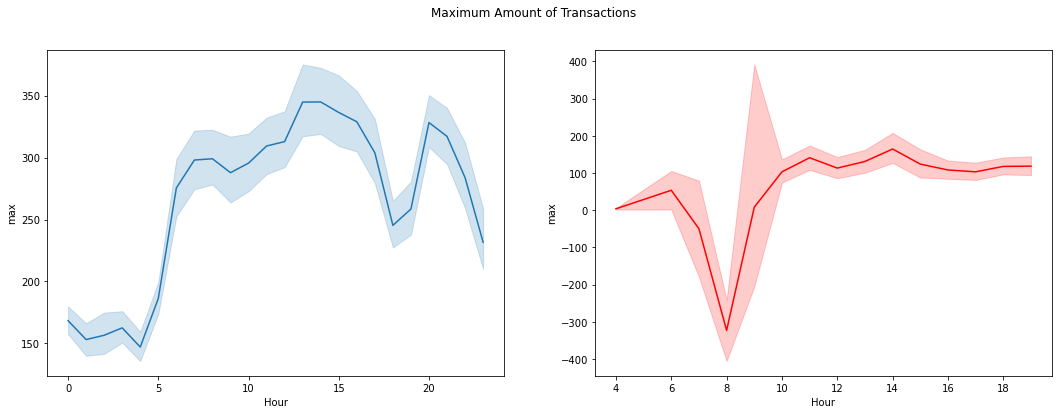

In [144]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="max", data=temp.loc[temp.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Hour", y="max", data=temp.loc[temp.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

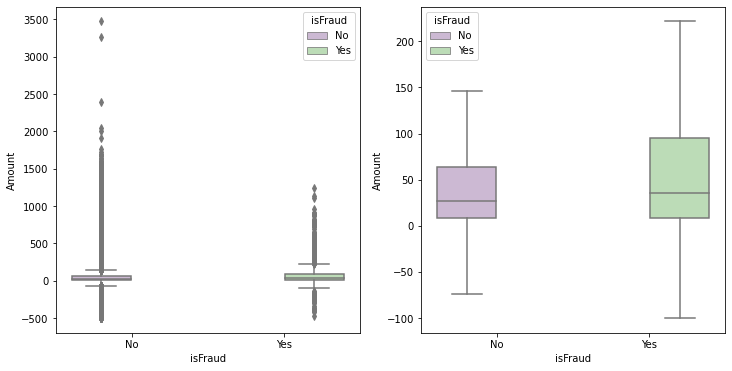

In [145]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="Amount", hue="isFraud",data=cct, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="Amount", hue="isFraud",data=cct, palette="PRGn",showfliers=False)
plt.show();

## Analytical of Day features

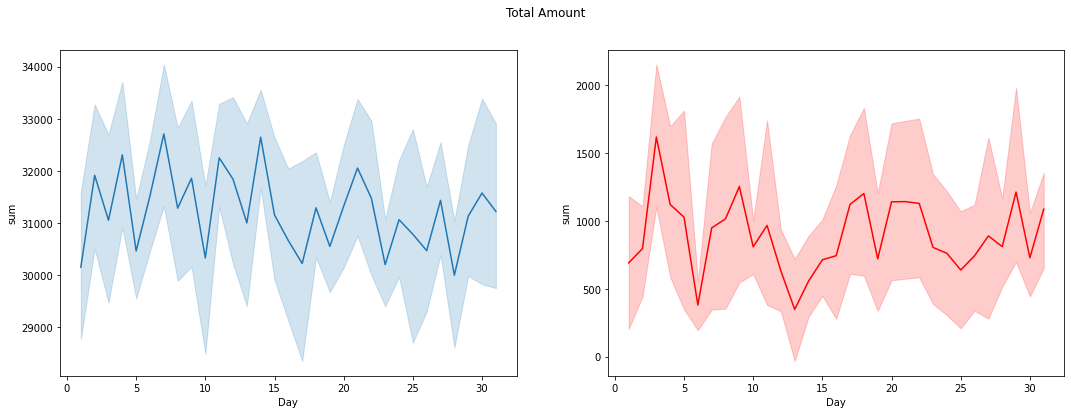

In [148]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="sum", data=fraud.loc[fraud.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="sum", data=fraud.loc[fraud.isFraud=='Yes'], color="red")
plt.suptitle("Total Amount")
plt.show();

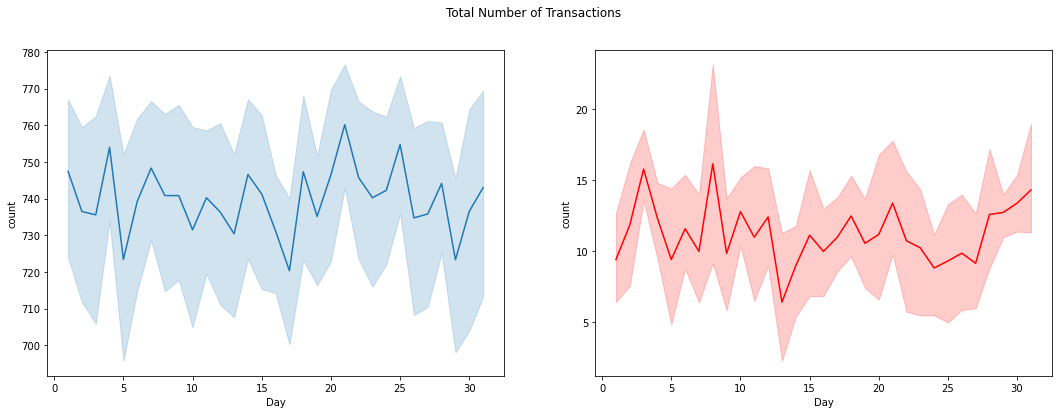

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="count", data=fraud.loc[fraud.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="count", data=fraud.loc[fraud.isFraud=='Yes'], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

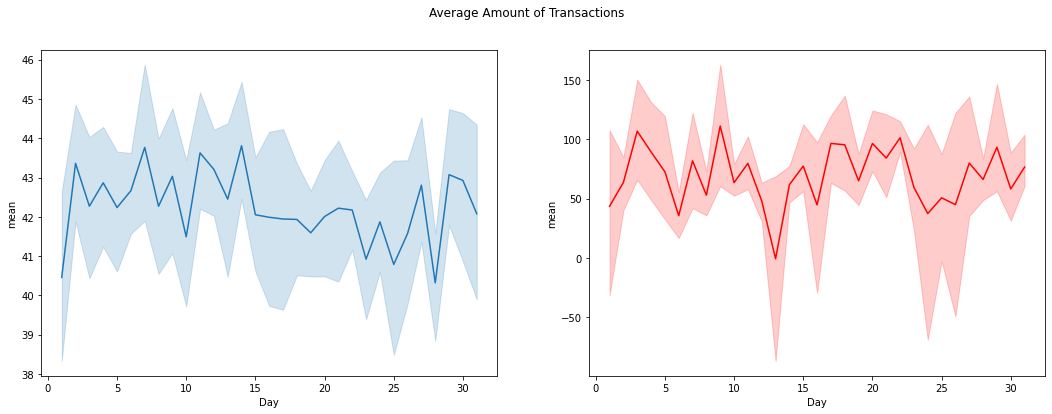

In [150]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="mean", data=fraud.loc[fraud.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="mean", data=fraud.loc[fraud.isFraud=='Yes'], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

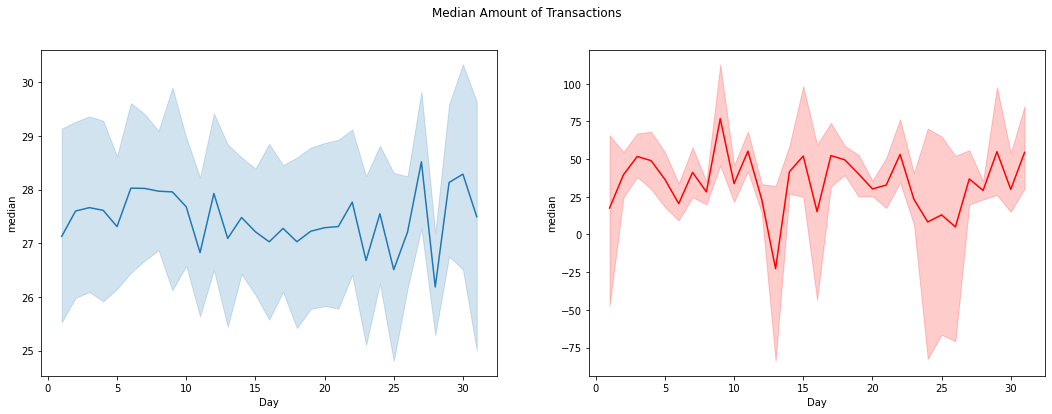

In [151]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="median", data=fraud.loc[fraud.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="median", data=fraud.loc[fraud.isFraud=='Yes'], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

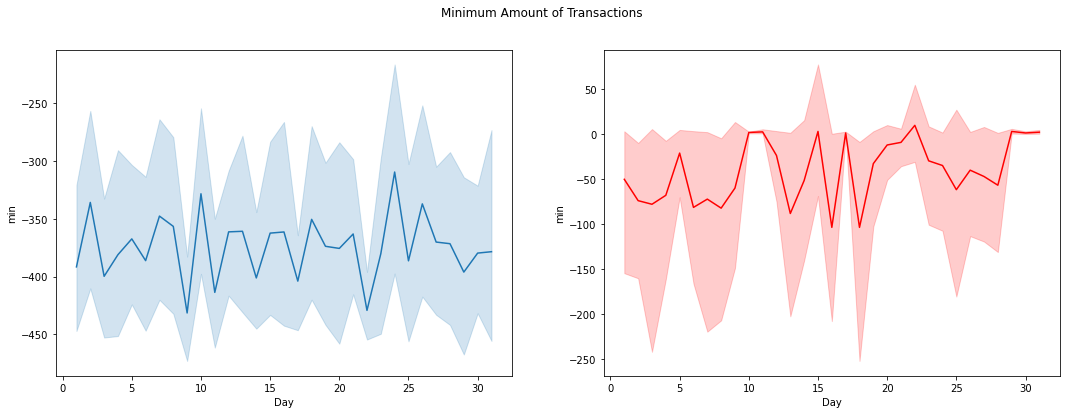

In [152]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="min", data=fraud.loc[fraud.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="min", data=fraud.loc[fraud.isFraud=='Yes'], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

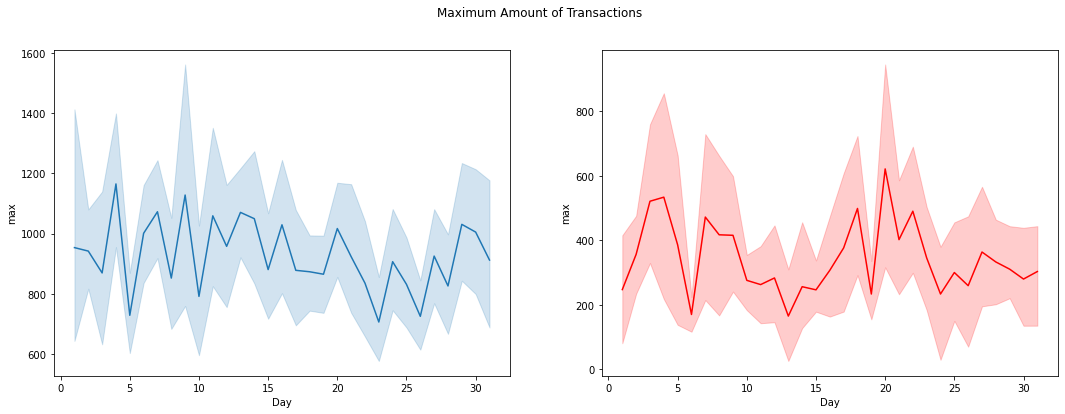

In [153]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Day", y="max", data=fraud.loc[fraud.isFraud=='No'])
s = sns.lineplot(ax = ax2, x="Day", y="max", data=fraud.loc[fraud.isFraud=='Yes'], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

## Machine Learning time....